# Term Project

## Relationship between Population, Air pollution and Respiratory diseases like COPD and Asthma

It is well known that _respiratory diseases_ are closely related to _air pollution_. Air pollutants can significantly affect the lungs and other parts of the respiratory system. When we breathe in air with pollutants that reach the lungs and other parts of the respiratory tract, it might cause irritation, inflammation, and damage. There are various factors that add to air pollution in a city, state, or country. Different locations within a state like counties could have different amounts of air pollution. <br>

_Population_ may also effect air pollution. The increased population can lead to increased transportation, deforestation, factories and industries, house cooking, and heating. All of these aid in increasing air pollution. Therefore, regions with higher populations will also have increased air pollution and higher prevalence of respiratory diseases like COPD and Asthma. This study will investigate if there is _any relationship between population and air pollution, which in turn increases the risk of respiratory diseases._

##### Data sources

 1. **Flat Files**
    - **2021 SMART: BRFSS City and County Data**
    The Behavioral Risk Factor Surveillance System (BRFSS) is the nation’s premier system of health-related telephone surveys that collect state data about U.S. residents regarding their health-related risk behaviors, chronic health conditions, and use of preventive services. The Behavioral Risk Factor Surveillance System (BRFSS) Selected Metropolitan/Micropolitan Area Risk Trends (SMART) is a documented and verified subset of the 2021 BRFSS that has been produced to provide some local-area estimates (CDC. n.d.).
This file contains BRFSS survey data released on November 2022. Dataset is in ASCII fixed width format. There are many varibales in dataset some of which are coded and transformed. Dataset variable layout can be refered [here][1] and The defination of calculated varibales can be refered in [BRFSS website][2].

**[Link to dataset][3]**

The variables will be extracted and used in this study from this dataset.
* _SEX - Gender
* _RACE - Race
* _AGE_G - Age category (e.g. 1: 18-24, 2: 25-34)
* WTKG3 - Weight in Kgs
* HTIN4 - Height in inches
* _BMI5 - Calculated Body mass index
* _SMOKER3 - Smoking status level (e.g. 1: current smoker, smokes ever day, 2: current smoker, smokes some days)
* _CURECI1 - Denotes whether repondent uses e-cigarette
* _LTASTH1 - Denotes whether repondent reported that they ever had Asthma
* _CASTHM1 - Denotes whether repondent reported that they currently have Asthma
* MMSANAME - Metropolitan Statistical Area name. This variable provides both state and county/main city name of the repondent

    - **Estimated COPD prevalance by County**
    This dataset contains modeled COPD prevalence based on BRFSS survey data for counties. This dataset is a comma-separated file containing estimated COPD prevalance and its $95$% confidence interval, county name and state name.
**[Link to dataset][4]**

The below variables will used or referred in this study from this dataset.
* FullGeoName - Name of the location including State code and County
* StateDesc - State full nme
* County - County name
* Percent_COPD - Percentage estimates of COPD in a county.


[1]:https://www.cdc.gov/brfss/annual_data/2021/pdf/MMSA_VarLayout_21-508.pdf
[2]:https://www.cdc.gov/brfss/annual_data/2021/pdf/2021-calculated-variables-version4-508.pdf
[3]:https://www.cdc.gov/brfss/annual_data/2021/files/MMSA2021_ASC.zip
[4]:https://www.cdc.gov/copd/data-and-statistics/county-estimates.html

2. **API**
   - **Air Pollution API**
     Air pollution api from OpenWeather provides current air pollution data like air quality index and particulates for a set of coordinates (latitude and longitude). We can pass latitude and longitude in the api request call to retrive current air pollution data for that location.
     [Link to API documentation][1]


   - **Geocoding API**
     Geocoding api provides geographical coordinates (latitude and longitude) by using location area name like city or county. We can pass location area name (e.g. town), state code and a ISO 3166 coutry code (like US, UK, etc.) to retrieve latitude and longitude for that location area.
     [Link to API documentation][2]


For this study the below fields from the air pollution api response will be extracted and used:
* _aqi_ - Air Quality Index.
* _co_ - Concentration of Carbon monoxide
* _no_ - Concentration of Nitrogen monoxide
* _no2_ - Concentration of Nitrogen dioxide
* _o3_ - Concentration of Ozone
* _pm2_5_ - Concentration of [Fine particles matter][3]
* _pm10_ - Concentration of [Coarse particulate matter][4]
* _nh3_ - Concentration of Ammonia

Possible values and levels mapping (e.g. low, high, moderate, etc.) can be referred in this [link][5].

[1]:https://openweathermap.org/api/air-pollution
[2]:https://openweathermap.org/api/geocoding-api#direct
[3]:https://en.wikipedia.org/wiki/Particulates
[4]:https://en.wikipedia.org/wiki/Particulates#Size,_shape_and_solubility_matter
[5]:https://openweathermap.org/air-pollution-index-levels


3. **Website**
   - **Wikipedia - County statistics of the United States**
     Wikipedia [County statistics of the United States][1] page contains the links to further Wikipedia pages with county statistics for US states. These state level Wikipedia pages contain data like Population, Area, etc. and main city for each counties in a state [e.g. Texas][2].
     
   ![Image][3]
   <center>Fig 1. Website snip from the Texas Wiki page showinf data layout</center>

From the _wiki_ website page, `County name`, `County Seat/Largest Town`, `Fips Code`, `Population` and `Area` will be extracted for this study. `County Seat` is similar to main town within in a county.
    
[1]:https://en.wikipedia.org/wiki/County_statistics_of_the_United_States
[2]:https://en.wikipedia.org/wiki/List_of_counties_in_Texas
[3]:./texas.jpg


<br>

#### Relationship

**Flat Files**: _BRFSS Ascii format fixed width file_ contains survey data from respondents which includes various health related indicators including Asthma and also the location(county/town and state) the respondent belongs.
_COPD prevalence csv dataset_ contains the estimated COPD prevalence percentage by location(county and state).

**API**: _Geocoding Api_ provides latitude and longitude based on a location (town and state). _Air pollution api_ provides air pollution indicators based on latitude and longitude. Therefore, combining thes two apis we can retrieve air pollution indicators for a location.

**Website**: _Wikipedia_ website provides the population data by county, main town (county seat) and state.

The above `three` data sources are related by _location(county/town and state)_.

<br>

HTML pages of the website will be parsed using _web scraping_ to retrieve the area, population, county name, main town for each US state. This extracted data will be stored in a database table which will provide population for all counties for all US states. The latitude and longitude for the main town of a county will be identified utilizing the Geocoding API. Latitude and longitude will be then subsequently used to retrieve air pollution indicators for that town. Thus, air pollution indicators for the all the counties will be retrieved and stored in a database table. The ASCII flat file will be parsed to retrieve each respondent's Asthma response and smoking habits. The responses must be rolled up at the county level to calculate the Asthma prevalence and smoking habits percentage for each county. This data will be joined with the COPD prevalence CSV flat file and loaded in a single database table, which will serve as a source for both COPD and Asthma prevalence for all the counties. <br>

In each stage of retrieving and cleaning data from the source, the detection and the removal of outliers will also be performed. Further transformations like grouping, subsetting, whitespace removal, string manipulation may also need to be implemented to cleanse or parse data.<br> 

After the data from each source has been organized at the county level, those will be joined using county and state to create a single table or dataset, which will then serve as the source to generate visualizations for investigation of the relationship between population, air polution and repiratory diseases.<br>

There are some known limitations in this study like _sampling bias_, _measurement error_, and lack of _causality_ inference. As the BRFSS SMART data is a telephonic interview, the sample of respondendents answered the interview might not be a whole representation of the population because some persons might not be willing to participate in the survey and hence there are chances some communities are under representated introducing sampling bias. There are also chances that respondents mistakenly provide incorrect information or round up values which will introduce measurement error. This study will not be able to provide any causality to conclude increased population causes increased air pollution and which causes increases in repiratory diseases. Such cause and effect inferences can not be confirmed by this study. This study will be able to establish if relationship exists between population, air pollution and respiratory diseases, but not conclude whether one is caused by the other.<br>

Ethical considerations are important in any research study to ensure data privacy and the integrity of the research process. The BRFSS SMART survey data is anynomous and there is no information available to idenify the respondents. Also all the other datasets do not contain any personaly identifiable data. Therefore there are no risks of data privacy associated with this study. However, the outcome of the study must be reported with transparency and integrity irrespective of whether the results are consistent with the expectations and hypothesis.

#### Cleaning/Formatting Flat File Source

##### Step 1: Format ASCII data to read using fixed width only certain columns 

In [10]:
import PyPDF2
import os
import re
import pandas as pd
from matplotlib import pyplot as plt

In [11]:
# var_info = [
#         ('age', 101, 102, int),
#         ('sex', 143, 143, int),
#         ('wtyrago', 127, 130, int),
#         ('finalwt', 799, 808, int),
#         ('wtkg2', 1254, 1258, int),
#         ('htm3', 1251, 1253, int),
#         ]

# columns = ['name', 'start', 'end', 'type']

# variables = pd.DataFrame(var_info, columns=columns)
# variables

In [12]:
# variables.end += 1

# variables

In [13]:

# colspecs = variables[["start", "end"]] - 1

In [14]:
# colspecs

In [15]:
# # convert colspecs to a list of pair of int
# colspecs = colspecs.astype(int).values.tolist()
# names = variables["name"]

In [16]:
# colspecs

In [17]:
data = []
with open('./datasets/MMSA_VarLayout_21-508.pdf', 'rb') as pdfFileObj:
    # creating a pdf reader object
    pdfReader = PyPDF2.PdfReader(pdfFileObj)
    for each_page in pdfReader.pages:
        # pageObj = pdfReader.pages[0]
        # extracting text from page
        # print(each_page.extract_text())
        for text in each_page.extract_text().split("\n"):
            matches = re.findall("^(\d{1,3})\s(\w+)\s+(\d{1,2})", text)
            if matches:
                data.append([matches[0][0],matches[0][1], matches[0][2]])

In [18]:
colnames_df = pd.DataFrame(data, columns=["start", "colname", "field_length"])

In [19]:
colnames_df.head()

,start,colname,field_length
0,1,DISPCODE,4
1,5,SEQNO,10
2,15,STATERE1,1
3,16,CELPHON1,1
4,17,LADULT1,1


In [20]:
colnames_df.tail()

,start,colname,field_length
147,251,_FRUITE1,1
148,252,_VEGETE1,1
149,253,_MMSAWT,10
150,263,MMSANAME,10
151,363,_MMSA,5


In [21]:
col_list = [
    "SEQNO",
    "STATERE1",
    "_SEX",
    "_RACE",
    "_AGE_G",
    "WTKG3",
    "_BMI5",
    "_SMOKER3",
    "_PNEUMO3",
    "ASTHMA3",
    "ASTHNOW",
    "MMSANAME",
    "_MMSA",
]

In [22]:
required_colnames = colnames_df.query(f"colname in {col_list}").reset_index(drop=True)

In [23]:
required_colnames["start"] = required_colnames["start"].astype("int") - 1

In [24]:
required_colnames["end"] = required_colnames["start"] + required_colnames["field_length"].astype("int") 

In [25]:
required_colnames

,start,colname,field_length,end
0,4,SEQNO,10,14
1,14,STATERE1,1,15
2,47,ASTHMA3,1,48
3,48,ASTHNOW,1,49
4,168,_RACE,1,169
5,172,_SEX,1,173
6,178,_AGE_G,1,179
7,179,WTKG3,5,184
8,184,_BMI5,4,188
9,192,_SMOKER3,1,193


In [6]:
output_file = open("./datasets/asthma_data.csv", "w")
output_file.write(
    "_LTASTH1" + "|" 
    + "_CASTHM1" + "|" 
    + "_ASTHMS1" + "|" 
    + "MMSANAME_COUNTY" + "|" 
    + "MMSANAME_STATE" + "|"
    + "_MMSA" + "|" 
    + "STATERE1" + "\n"
)

73

In [7]:
with open("./datasets/MMSA21.ASC", "r", errors="ignore",encoding="ascii") as ascfile:
    for idx, line in enumerate(ascfile):
        # if idx > 1000:
        #     break
        # line_data = line.decode("ascii",errors="replace")
        line_data = line
        _LTASTH1 = line_data[157:158]
        _CASTHM1 = line_data[158:159]
        _ASTHMS1 = line_data[159:159]
        MMSANAME = line_data[262:362].split(",")
        MMSANAME_COUNTY = MMSANAME [0]
        MMSANAME_STATE = MMSANAME[1]
        _MMSA = line_data[362:367]
        STATERE1 = line_data[14:15]
        # print(_LTASTH1 + "|" 
        #                   + _CASTHM1+ "|" +
        #                   _ASTHMS1+ "|" 
        #                   + MMSANAME+ "|" +
        #                   _MMSA+ "|" +
        #                   STATERE1 + "\n")
        output_file.write(_LTASTH1 + "|" 
                          + _CASTHM1+ "|" +
                          _ASTHMS1+ "|" +
                          MMSANAME_COUNTY + "|" +
                          MMSANAME_STATE + "|" +
                          _MMSA+ "|" +
                          STATERE1 + "\n")

In [8]:
output_file.close()

_LTASTH1, _CASTHM1, _ASTHMS1, MMSANAME, _MMSA

In [9]:
# Read asthama data
df_asthma = pd.read_csv("./datasets/asthma_data.csv", sep="|")

In [10]:
df_asthma.head()

,_LTASTH1,_CASTHM1,_ASTHMS1,MMSANAME_COUNTY,MMSANAME_STATE,_MMSA,STATERE1
0,1,1,NaN,Aberdeen,SD,10100,
1,1,1,NaN,Aberdeen,SD,10100,
2,2,1,NaN,Aberdeen,SD,10100,
3,1,1,NaN,Aberdeen,SD,10100,
4,1,1,NaN,Aberdeen,SD,10100,


In [11]:
df_asthma["_CASTHM1"].unique()

array([1, 2, 9], dtype=int64)

In [12]:
df_asthma["MMSANAME_STATE"].unique()

array([' SD', ' OH', ' NY', ' NM', ' AK', ' GA', ' GA-SC', ' TX', ' MD',
       ' LA', ' WV', ' MT', ' AL', ' ND', ' ID', ' MA', ' VT', ' NJ',
       ' IA', ' SC', ' NC-SC', ' TN-GA', ' IL-IN-WI', ' OH-KY-IN', ' CO',
       ' MD-WV', ' MN-WI', ' ND-MN', ' AR', ' IN', ' NE', ' MI', ' CT',
       ' UT', ' WV-KY-OH', ' MS', ' MO-KS', ' TN', ' NH-VT', ' CA',
       ' KY-IN', ' KS', ' TN-MS-AR', ' WI', ' PA', ' SC-NC', ' NJ-PA',
       ' NY-NJ', ' OK', ' NE-IA', ' AZ', ' ME', ' OR-WA', ' RI-MA', ' NC',
       ' NV', ' VA', ' NH', ' MO-IL', ' OR', ' MD-DE', ' PR', ' WA',
       ' IA-NE-SD', ' VA-NC', ' DC-VA-MD-WV', ' DE-MD-NJ', ' MA-CT',
       ' OH-PA'], dtype=object)

In [13]:
df_asthma["_LTASTH1"].unique()

array([1, 2, 9], dtype=int64)

In [14]:
df_subset = df_asthma[["_LTASTH1", "_CASTHM1", "MMSANAME_COUNTY", "MMSANAME_STATE"]].drop_duplicates()

In [18]:
df_subset.head()

,_LTASTH1,_CASTHM1,MMSANAME_COUNTY,MMSANAME_STATE
0,1,1,Aberdeen,SD
2,2,1,Aberdeen,SD
20,2,2,Aberdeen,SD
77,2,9,Aberdeen,SD
272,9,9,Aberdeen,SD


In [21]:
df_subset["MMSANAME_STATE"] = df_subset["MMSANAME_STATE"].apply(lambda x: x.strip())

In [23]:
df_subset[df_subset["MMSANAME_STATE"] == "GA"].apply(lambda x : True if "Baxley" in x.lower() else False)

,_LTASTH1,_CASTHM1,MMSANAME_COUNTY,MMSANAME_STATE
7781,2,1,Atlanta-Sandy Springs-Alpharetta,GA
7782,1,1,Atlanta-Sandy Springs-Alpharetta,GA
7783,2,2,Atlanta-Sandy Springs-Alpharetta,GA
8119,2,9,Atlanta-Sandy Springs-Alpharetta,GA
8485,9,9,Atlanta-Sandy Springs-Alpharetta,GA


In [137]:
df_having_asthma = df_subset[df_subset["_LTASTH1"] == 2].groupby("MMSANAME_STATE").count().reset_index()

In [138]:
df_having_asthma

,MMSANAME_STATE,_LTASTH1,_CASTHM1,MMSANAME_COUNTY
0,AK,3,3,3
1,AL,6,6,6
2,AR,6,6,6
3,AZ,3,3,3
4,CA,12,12,12
...,...,...,...,...
64,VT,3,3,3
65,WA,6,6,6
66,WI,3,3,3
67,WV,6,6,6


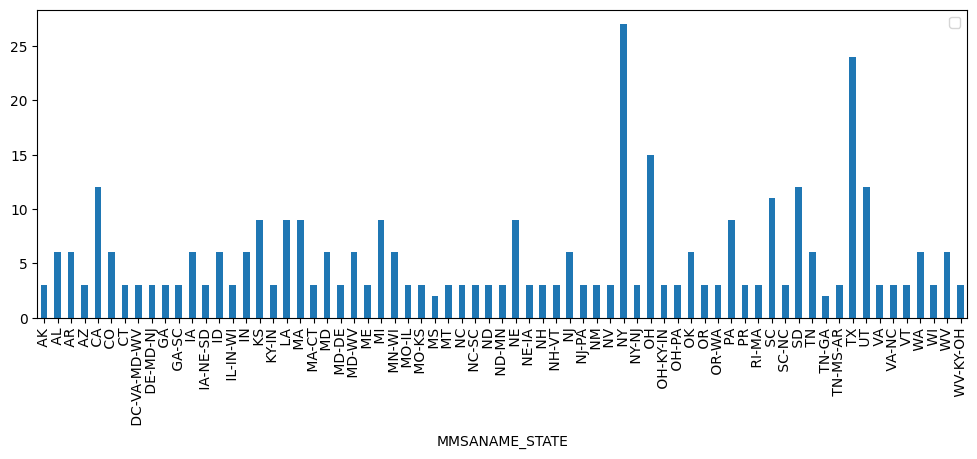

In [142]:
df_having_asthma.plot.bar(x="MMSANAME_STATE",y="_LTASTH1", figsize=(12,4), rot=90)
plt.show()

<Axes: ylabel='Frequency'>

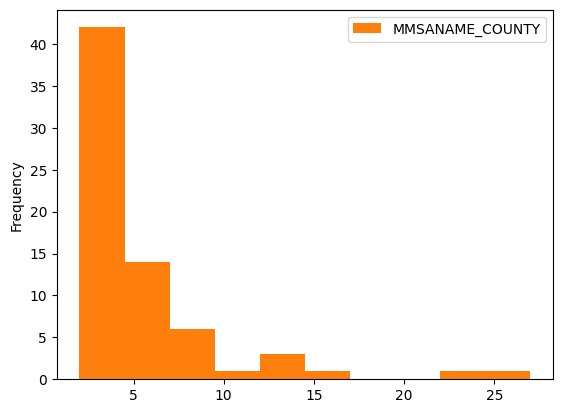

In [146]:
df_having_asthma.plot.hist(x="_LTASTH1", bins=10)

<Axes: >

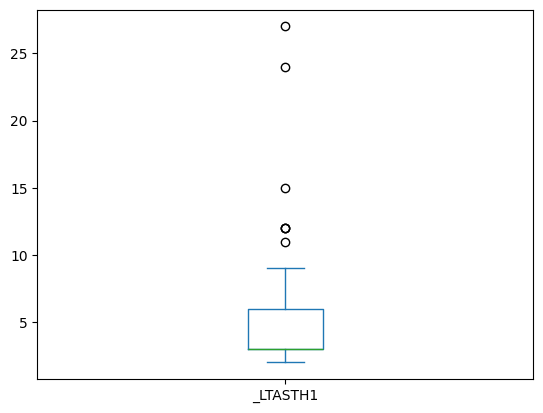

In [147]:
df_having_asthma.plot.box(y="_LTASTH1")

df_having_asthma["_LTASTH1"].describe()

## References
About BRFSS. (n.d.). _CDC_. **https://www.cdc.gov/brfss/about/index.htm**